# ST Technical Assessment

Help a fictional e-commerce company improve customer retention and optimize marketing efforts. Data source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

In [73]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 

In [74]:
# Import dataset
# Get folder path
folder_path = "C:/Users/eunic/Downloads/Brazilian E-Commerce Public Dataset by Olist"
# Get CSV file names
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Extract CSV files
for x in csv_files:
    # Get file name
    file_name = x.split('.csv')[0]
    # Run code to read CSV file 
    exec(f"{file_name} = pd.read_csv(folder_path + '/' + x).drop_duplicates()")
    # Print file name
    print(file_name)
    # Print information of dataset
    exec(f"{file_name}.info()")
    print("\n")


olist_customers_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


olist_geolocation_dataset
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geoloc

In [75]:
# Print all file names
csv_files

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

## Data Cleaning

In [76]:
# Convert to datetime
for c in range(3,len(olist_orders_dataset.columns)):
    col_name = olist_orders_dataset.columns[c]
    olist_orders_dataset[col_name] = pd.to_datetime(olist_orders_dataset[col_name], format="%Y-%m-%d %H:%M:%S")

# Check the data where 'order_approved_at' is null and 'order_status' is canceled.
olist_orders_dataset[(olist_orders_dataset['order_approved_at'].isna()) & (olist_orders_dataset['order_status'] != 'canceled')]

# Calculate approval lead time, approval_lead_time = order_approved_at - order_purchase_timestamp. 
olist_orders_dataset['approval_lead_time'] = olist_orders_dataset['order_approved_at'] - olist_orders_dataset['order_purchase_timestamp']

# Calculate carrier delivered lead time, carrier_delivered_lead_time = order_delivered_carrier_date - order_approved_at. 
olist_orders_dataset['carrier_delivered_lead_time'] = olist_orders_dataset['order_delivered_carrier_date'] - olist_orders_dataset['order_approved_at'] 

# Calculate customer delivered lead time, customer_delivered_lead_time = order_delivered_customer_date - order_delivered_carrier_date. 
olist_orders_dataset['customer_delivered_lead_time'] = olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_delivered_carrier_date'] 


In [77]:
# Check the statistic of olist_orders_dataset
olist_orders_dataset.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time
count,99441,99281,97658,96476,99441,99281,97644,96475
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,0 days 10:25:08.739486910,2 days 19:19:15.298850927,9 days 07:55:59.254148743
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 00:00:00,-172 days +18:44:38,-17 days +21:41:31
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,0 days 00:12:54,0 days 21:00:44,4 days 02:23:55.500000
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,0 days 00:20:36,1 days 19:38:29.500000,7 days 02:23:40
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,0 days 14:34:51,3 days 13:55:52.500000,12 days 00:41:55.500000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00
std,NaN,NaN,NaN,NaN,NaN,1 days 02:02:16.813098347,3 days 13:11:10.497083683,8 days 18:14:34.522067763


#### Impute missing values in 'order_approved_at' column

In [78]:
# Check NA values of 'order_approved_at' that do not have 'order_status' = canceled
olist_orders_dataset[(olist_orders_dataset['order_approved_at'].isna()) & (olist_orders_dataset['order_status'] != 'canceled')]

# Orders with order_status = delivered should have order_approved_at datetime. 
# It can be imputed either using the median or mean values.
# Since mean > median, it shows the distribution is right-skewed. Hence, we will use the median value instead. 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,NaT,NaT,6 days 01:20:46
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,NaT,NaT,NaT
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,NaT,NaT,NaT
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,NaT,NaT,7 days 01:03:14
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,NaT,NaT,6 days 15:42:13
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,NaT,NaT,NaT
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,NaT,NaT,14 days 20:05:37
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,NaT,NaT,7 days 23:46:08
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,NaT,NaT,5 days 03:19:11
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,NaT,NaT,7 days 00:30:10


In [79]:
# Get median value
median = olist_orders_dataset['approval_lead_time'].median()

# Set the condition
condition = (olist_orders_dataset['order_status'] == 'delivered') & (olist_orders_dataset['order_approved_at'].isna())

# Impute median value to 'approval_lead_time' column
olist_orders_dataset.loc[condition, 'approval_lead_time'] = median

# # The median value will only be imputed when order_status = 'delivered' and order_approved_at is empty. 
# Recalculate 'order_approved_at'
olist_orders_dataset.loc[(olist_orders_dataset['order_approved_at'].isna()),'order_approved_at'] = olist_orders_dataset['order_purchase_timestamp'] + olist_orders_dataset['approval_lead_time']


#### Handling data discrepancy for 'order_delivered_carrier_date'
From the overall statistics, there are data where 'order_approved_at' is later than 'order_delivered_carrier_date'.
To handle this data discrepancy, 'order_approved_at' will have the same datetime as 'order_delivered_carrier_date'.


In [80]:
# Set the condition
condition = olist_orders_dataset['order_approved_at'] > olist_orders_dataset['order_delivered_carrier_date']
olist_orders_dataset.loc[condition,'order_approved_at'] = olist_orders_dataset['order_delivered_carrier_date']

# Recalculate carrier delivered lead time
olist_orders_dataset['carrier_delivered_lead_time'] = olist_orders_dataset['order_delivered_carrier_date'] - olist_orders_dataset['order_approved_at'] 


#### Handling data discrepancy for 'order_delivered_customer_date'
From the overall statistics, there are data where 'order_delivered_carrier_date' is later than 'order_delivered_customer_date'.
To handle this data discrepancy, 'order_delivered_carrier_date' will have the same datetime as 'order_delivered_customer_date'.


In [81]:
# Set the condition
condition = olist_orders_dataset['order_delivered_carrier_date'] > olist_orders_dataset['order_delivered_customer_date']
olist_orders_dataset.loc[condition,'order_delivered_carrier_date'] = olist_orders_dataset['order_delivered_customer_date']

# Recalculate customer delivered lead time
olist_orders_dataset['customer_delivered_lead_time'] = olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_delivered_carrier_date'] 


In [82]:
# Recheck the statistic of olist_orders_dataset
olist_orders_dataset.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time
count,99441,99295,97658,96476,99441,99295,97658,96475
mean,2017-12-31 08:43:12.776581120,2017-12-31 17:09:59.385145088,2018-01-04 21:48:41.619560192,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,0 days 10:25:03.625247998,2 days 19:40:19.161789100,9 days 07:57:06.588535890
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 20:50:20.500000,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,0 days 00:12:54,0 days 21:00:55.250000,4 days 02:23:55.500000
50%,2018-01-18 23:04:36,2018-01-19 10:55:46,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,0 days 00:20:36,1 days 19:39:24.500000,7 days 02:23:40
75%,2018-05-04 15:42:16,2018-05-04 20:02:47.500000,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,0 days 14:34:43.500000,3 days 13:56:58,12 days 00:41:55.500000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00
std,NaN,NaN,NaN,NaN,NaN,1 days 02:02:11.194081636,3 days 11:45:44.406446219,8 days 18:12:54.657259204


## Data Preparation & Aggregation

In [83]:
# Calculate total order item value
olist_order_items_dataset['total_order_item_value'] = olist_order_items_dataset['order_item_id'] * olist_order_items_dataset['price']
# Calculate total freight value
olist_order_items_dataset['total_frieght_value'] = olist_order_items_dataset['order_item_id'] * olist_order_items_dataset['freight_value']
# Calculate total order value
olist_order_items_dataset['total_order_value'] = olist_order_items_dataset['total_order_item_value'] + olist_order_items_dataset['total_frieght_value']

In [84]:
#  Join olist_products_dataset and product_category_name_translation to get english category name
# Left join on product_category_name
products = olist_products_dataset.merge(product_category_name_translation, how='left', on='product_category_name')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [85]:
# Get the columns 
columns = list(products.columns)

# Rearrange columns: move the last column to the second position
new_order = [columns[0], columns[-1]] + columns[1:-1]

# Reorder the DataFrame columns
products = products[new_order]

# Extract only product_id and product_category_name_english
products = products.iloc[:,0:2]
products.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [86]:
# Join olist_order_items_dataset and products
# Left join on order_id
order_items = olist_order_items_dataset.merge(products, how='left', on='product_id')

In [87]:
order_items = order_items[['order_id', 'product_id', 'product_category_name_english', 'total_order_item_value', 'total_frieght_value', 'total_order_value']]
order_items.head()

,order_id,product_id,product_category_name_english,total_order_item_value,total_frieght_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,18.14,218.04


In [88]:
# Filter out delivered orders only
delivered_orders = olist_orders_dataset[olist_orders_dataset['order_status'] == 'delivered']

# Join delivered_orders and products
# Left join on order_id
order_df = delivered_orders.merge(order_items, how='left', on='order_id')

# Rearrange columns in products dataset
# cols = [products.columns[0], products.columns[-1]] + list(products.columns[2:-1])
# products = products[cols]

# Display dataset
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110197 non-null  object         
 1   customer_id                    110197 non-null  object         
 2   order_status                   110197 non-null  object         
 3   order_purchase_timestamp       110197 non-null  datetime64[ns] 
 4   order_approved_at              110197 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   110195 non-null  datetime64[ns] 
 6   order_delivered_customer_date  110189 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  110197 non-null  datetime64[ns] 
 8   approval_lead_time             110197 non-null  timedelta64[ns]
 9   carrier_delivered_lead_time    110195 non-null  timedelta64[ns]
 10  customer_delivered_lead_time   110188 non-null  timedelt

In [89]:
# Get year, quarter and month of order_purchase_timestamp
order_df['year_order_purchase'] = order_df['order_purchase_timestamp'].dt.year
order_df['month_order_purchase'] = order_df['order_purchase_timestamp'].dt.month
order_df['quarter_order_purchase'] = (order_df['month_order_purchase'] - 1) // 3 + 1

In [90]:
order_df['quarter_year_order_purchase'] = order_df['year_order_purchase'].astype(str) +" Q" + order_df['quarter_order_purchase'].astype(str)

In [91]:
# Display dataset
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110197 non-null  object         
 1   customer_id                    110197 non-null  object         
 2   order_status                   110197 non-null  object         
 3   order_purchase_timestamp       110197 non-null  datetime64[ns] 
 4   order_approved_at              110197 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   110195 non-null  datetime64[ns] 
 6   order_delivered_customer_date  110189 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  110197 non-null  datetime64[ns] 
 8   approval_lead_time             110197 non-null  timedelta64[ns]
 9   carrier_delivered_lead_time    110195 non-null  timedelta64[ns]
 10  customer_delivered_lead_time   110188 non-null  timedelt

### Exploratory Data Analysis

### Top 3 and Bottom 3 Sales and Revenue

In [92]:
# Sum the total quantity and revenue by product category
sales_qty_revenue = order_df.groupby('product_category_name_english').agg(
    {
        'total_order_value':'sum',
        'order_id': 'count'
    }
).sort_values(by='total_order_value',ascending=True).reset_index()
# order_df.groupby(['quarter_year_order_purchase','product_category_name_english'])['total_order_value'].sum().reset_index()
# Rename column 
sales_qty_revenue.rename(columns={'total_order_value':'sum_order_value',
                              'order_id':'count'}, inplace=True)

In [93]:
# Get the overall top 3 product revenue
overall_top_3_sales_revenue = sales_qty_revenue.sort_values(by='sum_order_value',ascending=False).reset_index().head(3)
overall_top_3_sales_revenue

,index,product_category_name_english,sum_order_value,count
0,70,health_beauty,1517369.99,9465
1,69,bed_bath_table,1458745.64,10953
2,68,watches_gifts,1327390.46,5859


Our top 3 overall sales categories based on revenue are healthy_beauty, bed_bath_table and watches_gifts.

In [94]:
# Sum the total quantity and revenue by quarters and product category
quar_sales_qty_revenue = order_df.groupby(['product_category_name_english', 'quarter_year_order_purchase']).agg(
    {
        'total_order_value':'sum',
        'order_id': 'count'
    }
).sort_values(by='total_order_value',ascending=True).reset_index()
quar_sales_qty_revenue.rename(columns={'total_order_value':'sum_order_value',
                              'order_id':'count'}, inplace=True)

In [95]:
quar_top_3_sales_revenue = quar_sales_qty_revenue[quar_sales_qty_revenue['product_category_name_english'].isin(overall_top_3_sales_revenue['product_category_name_english'])]

In [113]:
# Define the desired order of the quarters
quarter_order = ['2016 Q3', '2016 Q4', '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4', '2018 Q1', '2018 Q2', '2018 Q3'] 

# Sort the DataFrame by the quarter order
quar_top_3_sales_revenue.loc[:,'quarter_year_order_purchase'] = pd.Categorical(
    quar_top_3_sales_revenue['quarter_year_order_purchase'], 
    categories=quarter_order, 
    ordered=True
)

c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages

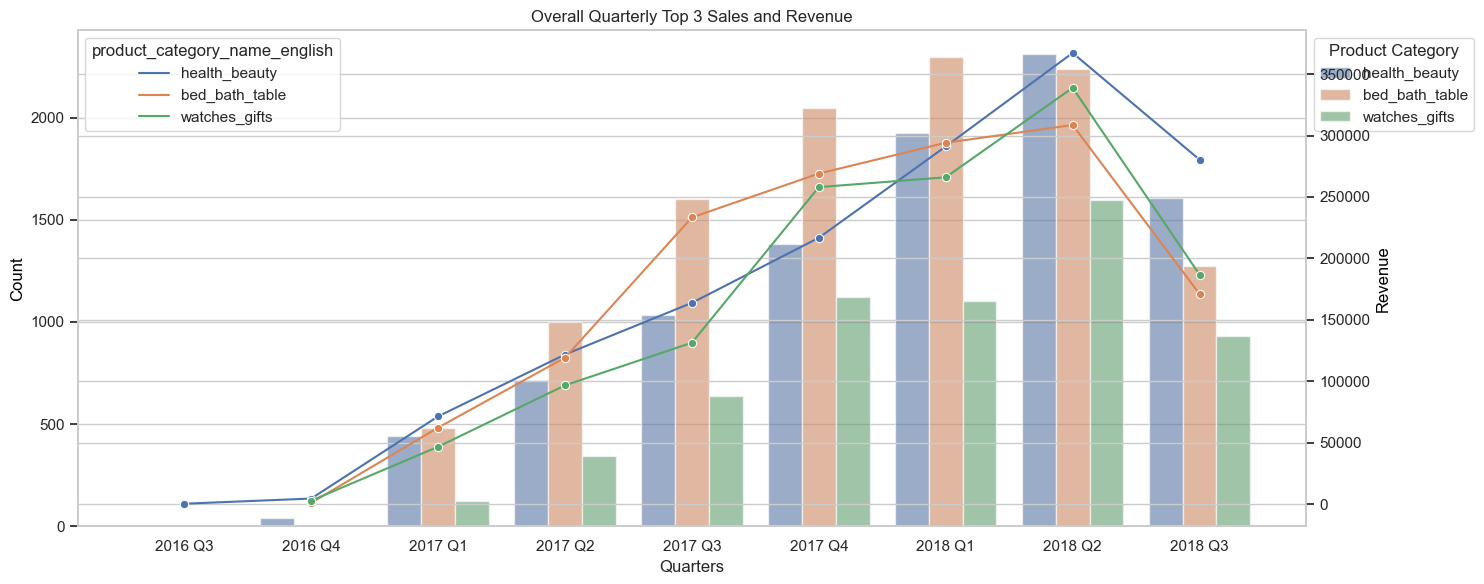

In [115]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create the main figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create the bar plot
bar_plot = sns.barplot(
    x='quarter_year_order_purchase', 
    y='count', 
    data=quar_top_3_sales_revenue, 
    hue='product_category_name_english', 
    alpha=0.6,
    ax=ax1
)

# Set the labels for the first y-axis
ax1.set_ylabel('Count', color='black')
ax1.set_xlabel('Quarters')
plt.title('Overall Quarterly Top 3 Sales and Revenue')

# Create a second y-axis
ax2 = ax1.twinx()

# Create the line plot
line_plot = sns.lineplot(
    x='quarter_year_order_purchase', 
    y='sum_order_value', 
    data=quar_top_3_sales_revenue, 
    hue='product_category_name_english', 
    marker='o', 
    dashes=False,
    ax=ax2
)

# Set the labels for the second y-axis
ax2.set_ylabel('Revenue', color='black')  # Change this label as needed

# Show the legend
ax1.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

Based on this visualisation, it can be inferred that watches_gifts although has the lowest quantity, it generates one of the highest revenue in the store. The store can put more efforts into the marketing of watches such as bringing in exclusive brands or collaborations, or increasing offers. In addition, looking at the revenue trend, all product categories have an overall increasing sales and revenue trend. 2018 Q3 is an anomoly as the latest data collected ends on 2018-08-29. 2018 Q3 data will not be taken into consideration for now.

In [97]:
# Get the overall bottom 3 product revenue
overall_bottom_3_sales_revenue = sales_qty_revenue.sort_values(by='sum_order_value',ascending=True).head(3)
overall_bottom_3_sales_revenue

,product_category_name_english,sum_order_value,count
0,security_and_services,324.51,2
1,fashion_childrens_clothes,598.67,7
2,cds_dvds_musicals,1077.21,14


In [98]:
quar_bottom_3_sales_revenue = quar_sales_qty_revenue[quar_sales_qty_revenue['product_category_name_english'].isin(overall_bottom_3_sales_revenue['product_category_name_english'])]

c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


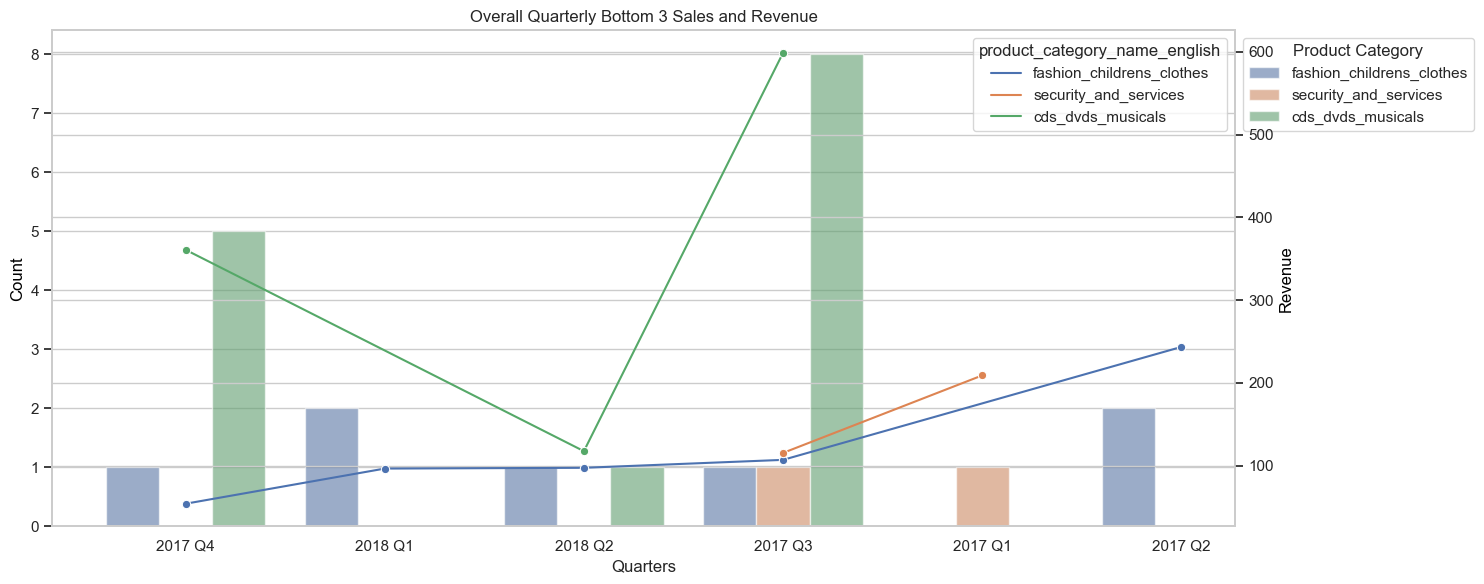

In [117]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create the main figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create the bar plot
bar_plot = sns.barplot(
    x='quarter_year_order_purchase', 
    y='count', 
    data=quar_bottom_3_sales_revenue, 
    hue='product_category_name_english', 
    alpha=0.6,
    ax=ax1,
    dodge=True
)

# Set the labels for the first y-axis
ax1.set_ylabel('Count', color='black')
ax1.set_xlabel('Quarters')
plt.title('Overall Quarterly Bottom 3 Sales and Revenue')

# Create a second y-axis
ax2 = ax1.twinx()

# Create the line plot
line_plot = sns.lineplot(
    x='quarter_year_order_purchase', 
    y='sum_order_value', 
    data=quar_bottom_3_sales_revenue, 
    hue='product_category_name_english', 
    marker='o', 
    dashes=False,
    ax=ax2  # Overlay on the same axes
)

# Set the labels for the second y-axis
ax2.set_ylabel('Revenue', color='black')  # Change this label as needed

# Show the legend
ax1.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

RFM Analysis

In [100]:
latest_purchase_date = order_df['order_purchase_timestamp'].max() + pd.Timedelta('1 day')

In [101]:
rfm = order_df.groupby('customer_id').agg({
'order_purchase_timestamp': lambda x: (latest_purchase_date - x.max()).days,
'order_id': 'count',
'total_order_value': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [102]:
rfm.describe()

,Recency,Frequency,Monetary
count,96478.000000,96478.000000,96478.000000
mean,240.121364,1.142198,182.222243
std,152.836972,0.538804,388.692861
min,1.000000,1.000000,9.590000
25%,116.000000,1.000000,62.590000
50%,221.000000,1.000000,107.940000
75%,350.000000,1.000000,188.990000
max,714.000000,21.000000,61488.360000


In [103]:
# Segment customers based on RFM score
def rfm_segmentation(x):
    # Define customer segmentation based on RFM segments
    if x['Recency'] <= 116 and x['Frequency'] >= 3 and x['Monetary'] > 188.99:
        return 'High-Value'
    elif x['Recency'] <= 350 and x['Frequency'] >= 2 and x['Monetary'] > 107.94:
        return 'Medium-Value'
    else:
        return 'Low-Value'
    
rfm['Segment'] = rfm.apply(rfm_segmentation, axis=1)

In [104]:
rfm_count = rfm['Segment'].value_counts().reset_index()
rfm_count

,Segment,count
0,Low-Value,89798
1,Medium-Value,6152
2,High-Value,528


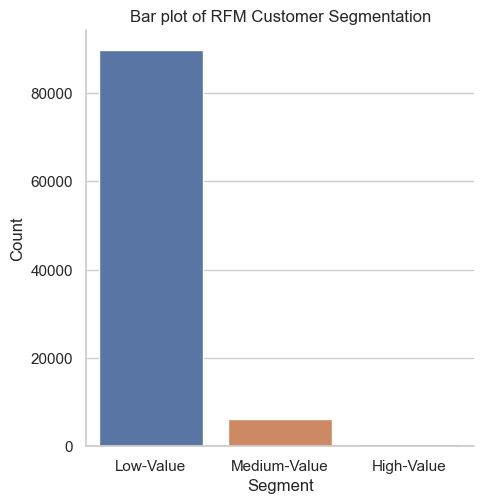

In [105]:
# Display bar charts of the customer segmentation
# Create a plot
sns.catplot(x='Segment', y='count', 
            data=rfm_count,
            kind='bar',
            errorbar=None)
## Set title
plt.title('Bar plot of RFM Customer Segmentation')
## Set y axis label
plt.ylabel('Count')
## Display plot
plt.show()

Based on the RFM analysis, we have a relatively high number of low-value customers. These customers have low engagement and spending at the store. 
The store can create targeted marketing campaigns to encourage these customers to return, or offer incentives such as discounts, free shipping or loyalty points to encourage more purchases. Another way is to conduct ask customers to do surveys about the store or analyse product reviews to understand the reason for low engagement or improve products/service.

For medium-value customers, these customers have moderate engagement and spending at the store.
The store can create personalised offers from the loyalty program and taylor it to these customers spending habits. From the loyalty system, the store can offer exclusive early access to new products or events to enhance their engagement and loyalty to the store. 

For high-value customers, these customers have high engagement and spending at the store. 
The store can increase retention efforts for these customers by creating VIP programs such as dedicated services, giving rewards, or exclusive access to events. They can also be rewarded for every person referred to shop at the store. It is also crucial that the store's products and services are up to these customers standards. Hence, it is important to get regular feedback from these customers to further improve the store and retain these customers' satisfaction.